In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        


In [2]:
data= pd.read_csv("C:\\Users\\Desktop\\Project\\heart_cleaned.csv")

In [3]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
data.shape

(319795, 18)

In [6]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [2]:
# percentage of missing values
pd.DataFrame((data.isnull().sum()/data.shape[0])*100)

,0
HeartDisease,0.0
BMI,0.0
Smoking,0.0
AlcoholDrinking,0.0
Stroke,0.0
PhysicalHealth,0.0
MentalHealth,0.0
DiffWalking,0.0
Sex,0.0
AgeCategory,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [8]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


# Exploratory Data Analysis

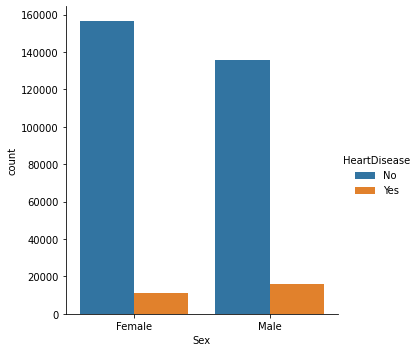

In [9]:
# Let us figure out gender-wise distribution of heart disease data among participants 

sns.catplot(x="Sex", kind="count",hue='HeartDisease', data=data)

In [ ]:
# form the graph it can be inferred the count of heart diseases is more for males than females

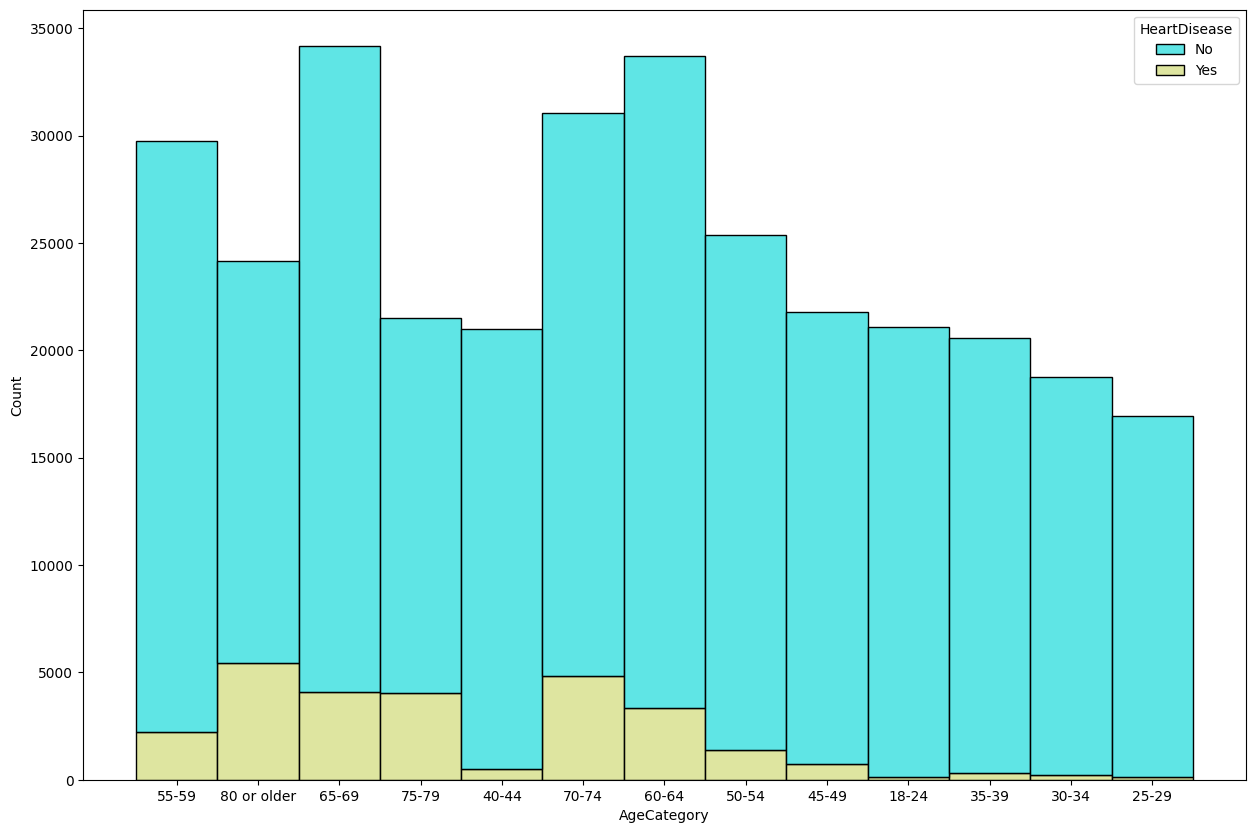

In [17]:
# Heart Disease in different age groups

plt.figure(figsize=(15,10))
sns.histplot(x='AgeCategory', data=data, hue='HeartDisease', multiple='stack',palette='rainbow')
plt.show()

In [ ]:
# Heart disease is higher in people above the age of 60 years

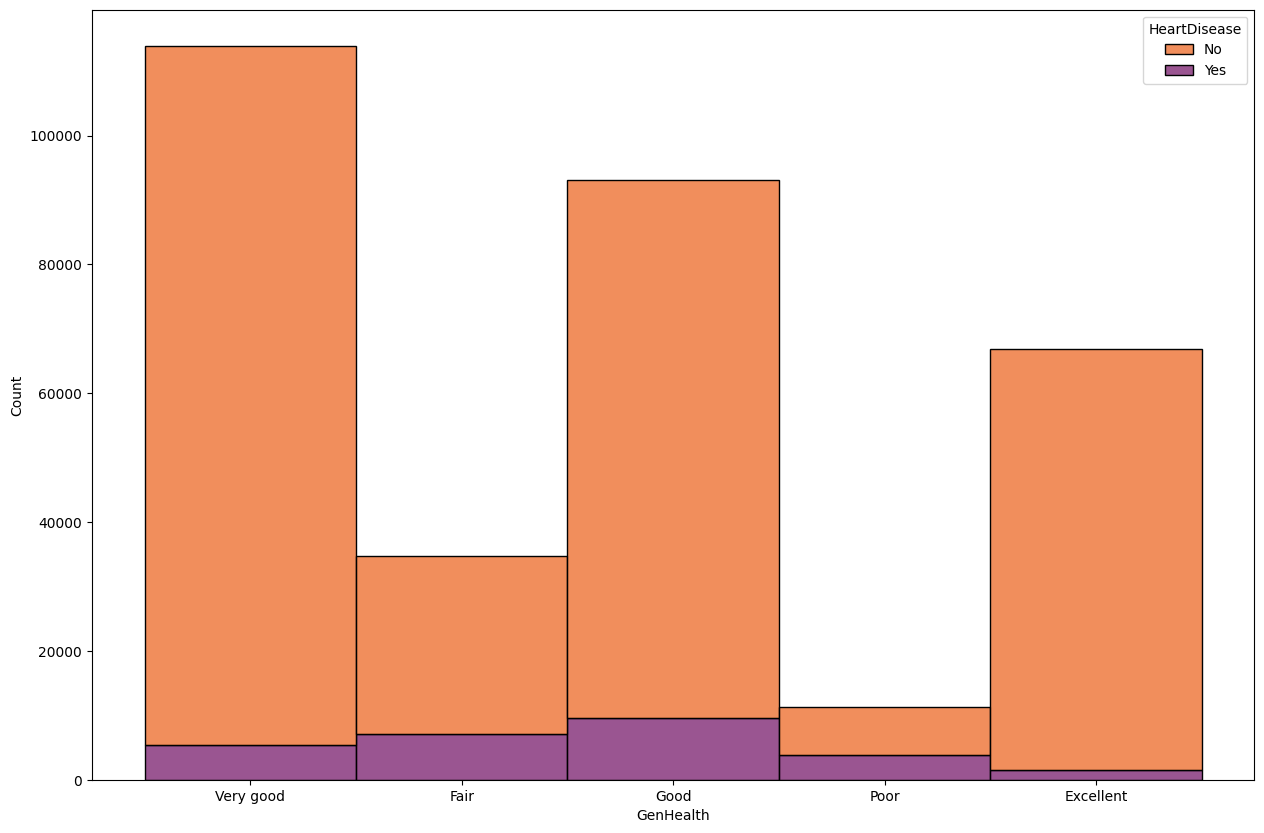

In [19]:
plt.figure(figsize=(15,10))
sns.histplot(x='GenHealth', data=data, hue='HeartDisease', multiple='stack',palette='inferno_r')
plt.show()

In [ ]:
# It can be inferred that when the overall health is poor then the presence of heart disease is more

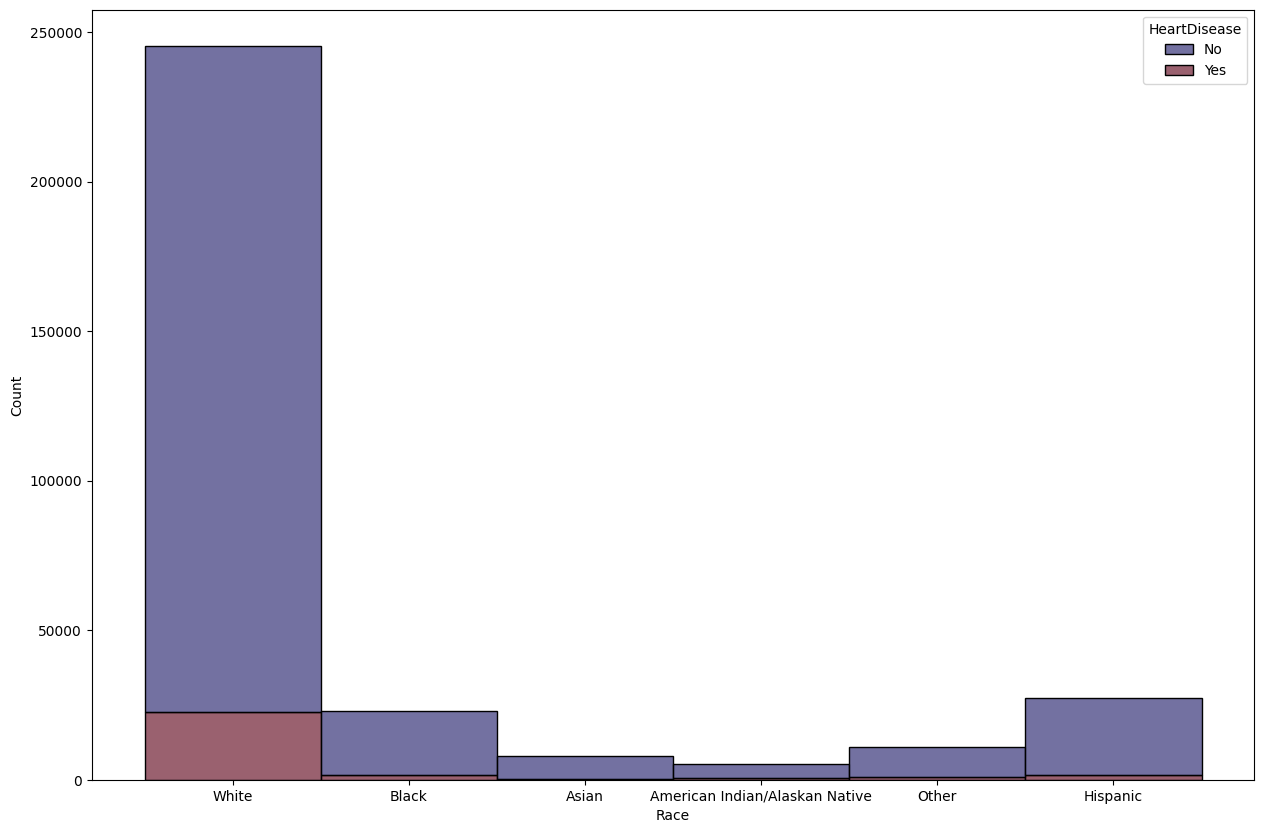

In [24]:
plt.figure(figsize=(15,10))
sns.histplot(x='Race', data=data, hue='HeartDisease', multiple='stack', palette='icefire')
plt.show()

In [ ]:
# heart disease is more in Whites

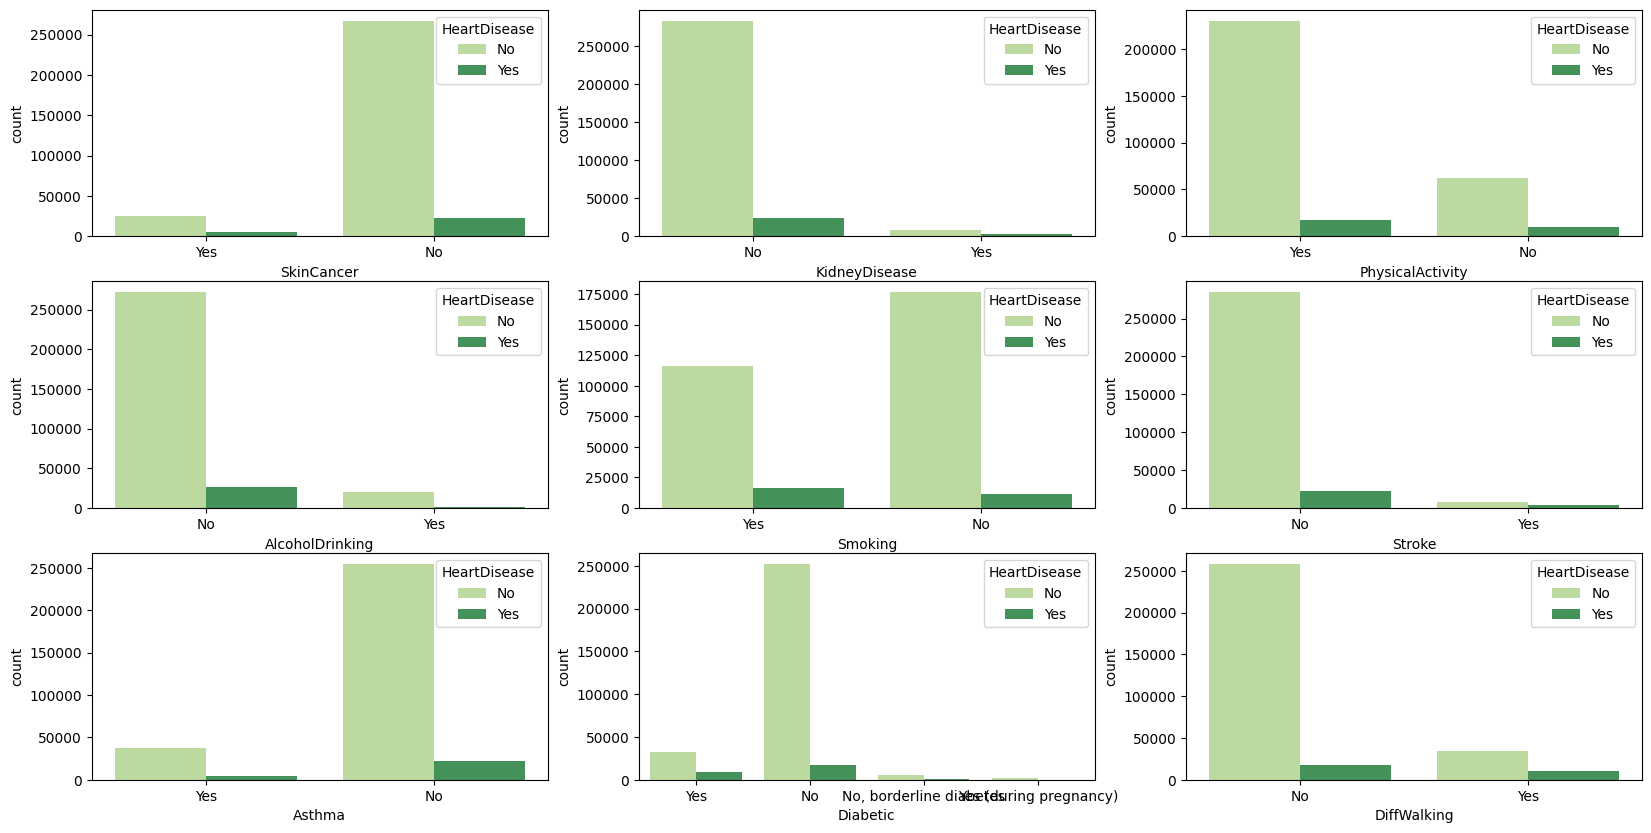

In [25]:
x_axis=['SkinCancer', 'KidneyDisease', 'PhysicalActivity', 'AlcoholDrinking', 'Smoking', 'Stroke', 'Asthma', 'Diabetic', 'DiffWalking']

fig=plt.figure(figsize=(20,10))

for i in range(0,len(x_axis)):
    sub_plot=fig.add_subplot(3,3,i+1)
    plot_map=sns.countplot(data=data,x=x_axis[i],hue='HeartDisease',palette='YlGn')


In [ ]:
# From all the graphs presented, it can be concluded that alcohol consumption and smoking are not the main factors in heart disease, as scientists testify to this.

In [27]:
df_numerical = data._get_numeric_data()

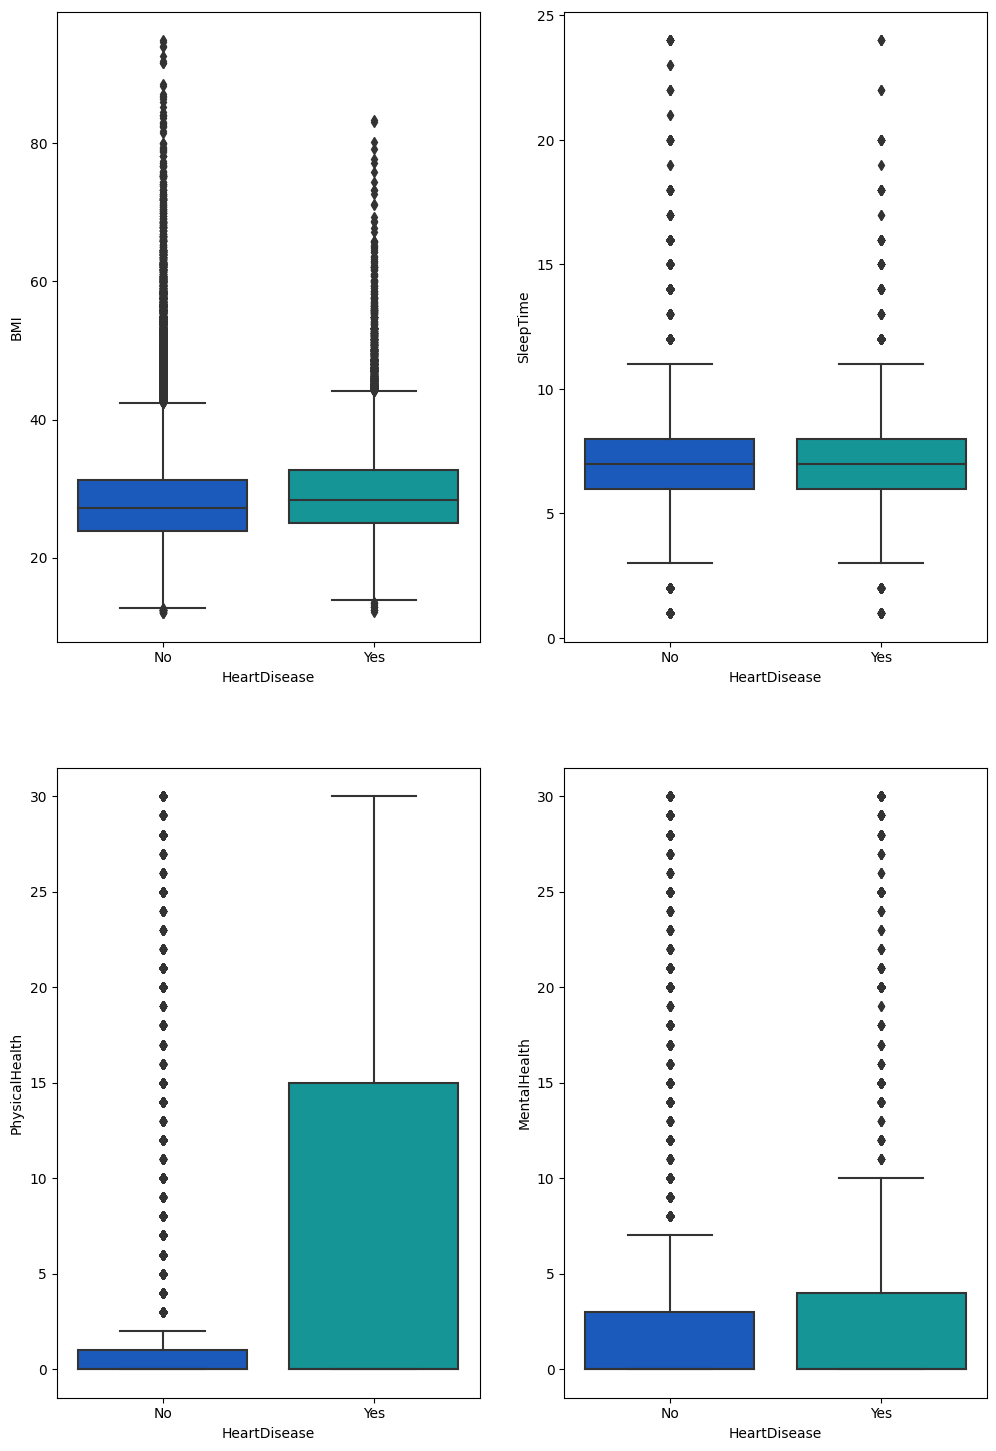

In [26]:
numeric=['BMI', 'SleepTime','PhysicalHealth', 'MentalHealth']
fig=plt.figure(figsize=(12,18))

for i in range(0,len(numeric)):
    fig.add_subplot(2,2,i+1)
    sns.boxplot(x='HeartDisease', y=numeric[i], data=data, palette='winter')

In [28]:
df_numerical = df_numerical.join(data['HeartDisease'])

<AxesSubplot:>

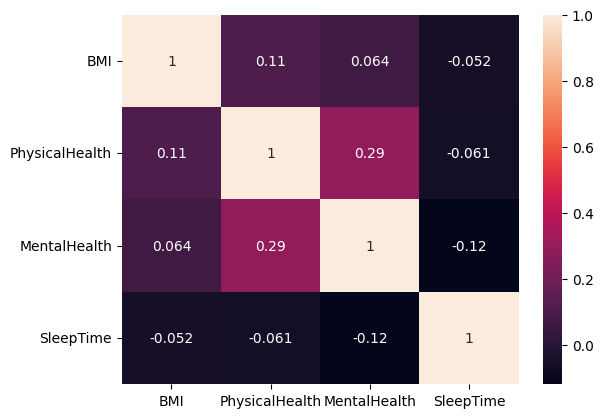

In [29]:
sns.heatmap(df_numerical.iloc[:, 0:].corr(), annot=True)

In [ ]:
# The only highest (not necessarily correlated) correlation is one between MentalHealth and PhysicalHealth = 0.29

# We can say that it is (not) necessarily to exist a combination of indicators that lead to heart disease. 
# For example: we cannot be sure/unsure that BOTH poor physical and mental health WILL lead to heart disease

In [ ]:
#Machine Learning Model

In [30]:
# dataset does have many categorical variables. Therefore, we will rearrange the columns.

data=data[['Race', 'AgeCategory', 'GenHealth','Sex','Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity','Asthma', 'KidneyDisease', 'SkinCancer','BMI', 'SleepTime', 'PhysicalHealth', 'MentalHealth', 'HeartDisease']]

In [31]:
#Let us understand more about different columns using unique values

for i in data.columns:
    print(f'Unique Values of {i.title()}: {data[i].unique()}')

Unique Values of Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Unique Values of Agecategory: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Unique Values of Genhealth: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Unique Values of Sex: ['Female' 'Male']
Unique Values of Smoking: ['Yes' 'No']
Unique Values of Alcoholdrinking: ['No' 'Yes']
Unique Values of Stroke: ['No' 'Yes']
Unique Values of Diffwalking: ['No' 'Yes']
Unique Values of Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
Unique Values of Physicalactivity: ['Yes' 'No']
Unique Values of Asthma: ['Yes' 'No']
Unique Values of Kidneydisease: ['No' 'Yes']
Unique Values of Skincancer: ['Yes' 'No']
Unique Values of Bmi: [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Unique Values of Sleeptime: [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Unique Values of P

In [32]:
data=data.replace(to_replace ="No, borderline diabetes", value ="Yes")
data=data.replace(to_replace ="Yes (during pregnancy)", value ="No")

In [33]:
categorical_var=['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease']

for i in categorical_var:
    data[i]=data[i].apply(lambda x: 0 if x=='No'else 1).astype('int64')


In [34]:
data['Sex']=data['Sex'].apply(lambda x: 0 if x=='Female'else 1).astype('int64')

In [35]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1:].values

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=1) 

In [38]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train[:,-4:]= sc.fit_transform(X_train[:, -4:])
X_test[:,-4:]= sc.transform(X_test[:, -4:])

In [39]:
# Now we will implement model pipeline guidelines and replicate above models and learn about best model
# amongst these classifiers

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

model_pipeline=[]
model_pipeline.append(DecisionTreeClassifier(random_state=41))
model_pipeline.append(LogisticRegression(solver='saga',random_state=42))
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(RandomForestClassifier(random_state=44))

In [40]:
model_list=['Decision Tree', 'Logistic Regression', 'K-Nearest Neighbors', 'Random_Forest_Classification']
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve
from sklearn import metrics

acc=[]
auc=[]
cm=[]

for classifier in model_pipeline:
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    acc.append(accuracy_score(Y_test, Y_pred))
    fpr,tpr,_thresholds=roc_curve(Y_test,Y_pred)
    auc.append(round(metrics.auc(fpr,tpr),2))
    cm.append(confusion_matrix(Y_test, Y_pred))

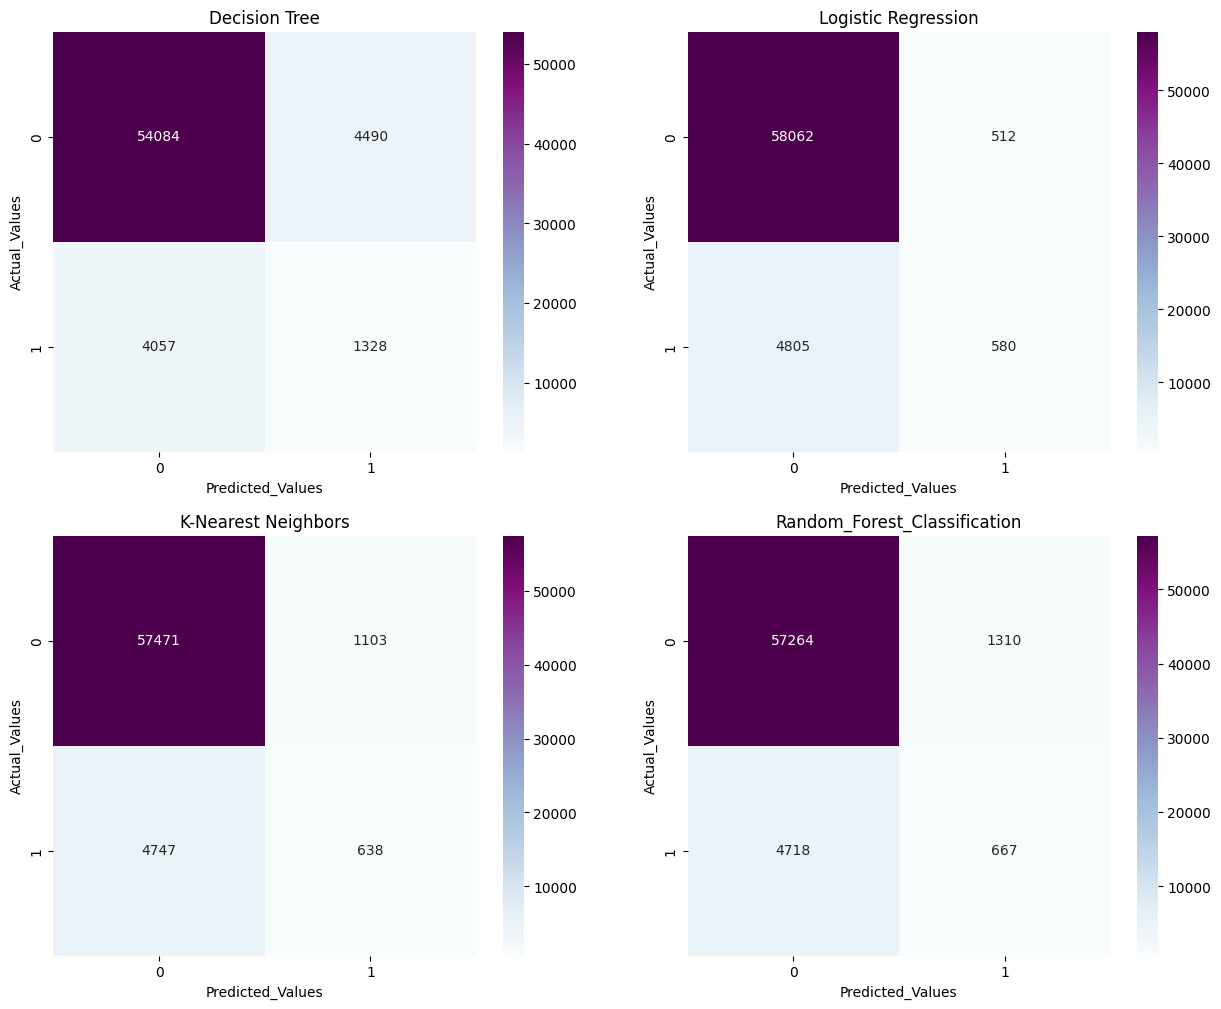

In [44]:
# Let us plot confusion matrix for all the model and compare.

fig=plt.figure(figsize=(15,12))

for i in range(0,len(cm)):
    cm_con=cm[i]
    model=model_list[i]
    sub_fig_title=fig.add_subplot(2,2,i+1).set_title(model)
    plot_map=sns.heatmap(cm_con,annot=True,cmap='BuPu',fmt='g')
    plot_map.set_xlabel('Predicted_Values')
    plot_map.set_ylabel('Actual_Values')
    

In [45]:
# Accuracy and AUC scores
result=pd.DataFrame({'Model': model_list, 'Accuracy': acc, 'AUC': auc})
result

,Model,Accuracy,AUC
0,Decision Tree,0.866368,0.58
1,Logistic Regression,0.916869,0.55
2,K-Nearest Neighbors,0.908535,0.55
3,Random_Forest_Classification,0.905752,0.55


In [46]:
from sklearn.model_selection import GridSearchCV
parameters = [{'solver': ['sag','saga','lbfgs']}]
grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 91.56 %
Best Parameters: {'solver': 'sag'}


In [47]:
# Best model is Logistic Regression with 91.6% accuracy